In [1]:
#Interacting Fermions on a 1D Lattice
#Quantum circuit of Hubbard Hamiltonian for Variational Quantum Eigensolver
import qiskit

In [2]:
import matplotlib.pyplot as plt
from qiskit.visualization import matplotlib


In [3]:
# initialization

# python libraries
import numpy as np
from copy import deepcopy

# qiskit libraries
from qiskit import *

# define the lattice
M  = 5    # number of lattice sites 
t  = 1.0  # hopping energy
U  = 0.1  # Coulomb energy
Nu = 3    # number of spin-up electrons 
Nd = 3    # number of spin-down electrons 

# initialize variational parameters 
S     = 3                     # number of Trotter-Suzuki steps 
theta = np.random.rand(S, 5)  # 5 Hamiltonian terms in each step 

# initialize the circuit 
circ_empty = QuantumCircuit(2*M)


In [4]:
 #compose quantum circuit 

def compose_initial_circuit(circuit, _M, _Nu, _Nd):
    for i in range(_Nu):
        circuit.x(i) 
    for i in range(_Nd): 
        circuit.x(_M+i)
    return circuit

circ_initial = compose_initial_circuit(deepcopy(circ_empty), M, Nu, Nd)
circ_initial.draw()


┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └───┘
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     ├───┤
q_6: ┤ X ├
     ├───┤
q_7: ┤ X ├
     └───┘
q_8: ─────
          
q_9: ─────

In [5]:
# compose quantum circuit 

def compose_ansatz_circuit(circuit, _M, _S, _theta): 
    # scale theta based on t and U
    _theta[:, :4] = -t/2.0*_theta[:, :4]
    _theta[:, 4] = U*_theta[:, 4]
    # loop over S Trotter-Suzuki steps 
    for j in range(_S):
        # XX and YY interactions: loop over even and odd terms
        for parity in [0]:
            # loop over orbitals
            for i in range(_M-1):
                if i%2 == parity:
                    # loop over spin up and down qubits
                    for spin_index in [0, _M]: 
                        circuit.cx(spin_index+i, spin_index+i+1)
                        circuit.rx(_theta[j, 2*parity+0], spin_index+i)    # theta_j,xe(o)
                        circuit.h(spin_index+i+1)
                        circuit.cx(spin_index+i+1, spin_index+i)
                        circuit.rx(-_theta[j, 2*parity+1], spin_index+i+1) # theta_j,ye(o)
                        circuit.cx(spin_index+i+1, spin_index+i)
                        circuit.h(spin_index+i+1)
                        circuit.cx(spin_index+i, spin_index+i+1) 
        # barrier
        circuit.barrier()
        # ZZ interactions
        # loop over orbitals
        for i in range(_M):
            circuit.crz(_theta[j, 4], i, _M+i)
    return circuit

circ_ansatz = compose_ansatz_circuit(deepcopy(circ_empty), M, S, theta)
circ_ansatz.draw()

┌──────────────┐┌───┐              ┌───┐           ░                 »
q_0: ──■──┤ Rx(-0.47563) ├┤ X ├──────────────┤ X ├───────■───░────────■────────»
     ┌─┴─┐└────┬───┬─────┘└─┬─┘┌────────────┐└─┬─┘┌───┐┌─┴─┐ ░        │        »
q_1: ┤ X ├─────┤ H ├────────■──┤ Rx(0.1885) ├──■──┤ H ├┤ X ├─░────────┼────────»
     └───┘┌────┴───┴─────┐┌───┐└────────────┘┌───┐└───┘└───┘ ░        │        »
q_2: ──■──┤ Rx(-0.47563) ├┤ X ├──────────────┤ X ├───────■───░────────┼────────»
     ┌─┴─┐└────┬───┬─────┘└─┬─┘┌────────────┐└─┬─┘┌───┐┌─┴─┐ ░        │        »
q_3: ┤ X ├─────┤ H ├────────■──┤ Rx(0.1885) ├──■──┤ H ├┤ X ├─░────────┼────────»
     └───┘     └───┘           └────────────┘     └───┘└───┘ ░        │        »
q_4: ────────────────────────────────────────────────────────░────────┼────────»
          ┌──────────────┐┌───┐              ┌───┐           ░ ┌──────┴───────┐»
q_5: ──■──┤ Rx(-0.47563) ├┤ X ├──────────────┤ X ├───────■───░─┤ Rz(0.023862) ├»
     ┌─┴─┐└────┬───┬─────┘└─┬─┘┌────────────┐└─┬─┘┌───┐┌─┴─┐ ░ └──────────────┘»
q_6: ┤ X ├─────┤ H ├────────■──┤ Rx(0.1885) ├──■──┤ H ├┤ X ├─░─────────────────»
     └───┘┌────┴───┴─────┐┌───┐└────────────┘┌───┐└───┘└───┘ ░                 »
q_7: ──■──┤ Rx(-0.47563) ├┤ X ├──────────────┤ X ├───────■───░─────────────────»
     ┌─┴─┐└────┬───┬─────┘└─┬─┘┌────────────┐└─┬─┘┌───┐┌─┴─┐ ░                 »
q_8: ┤ X ├─────┤ H ├────────■──┤ Rx(0.1885) ├──■──┤ H ├┤ X ├─░─────────────────»
     └───┘     └───┘           └────────────┘     └───┘└───┘ ░                 »
q_9: ────────────────────────────────────────────────────────░─────────────────»
                                                             ░                 »
«                                     ┌──────────────┐     ┌───┐      »
«q_0: ───────────────────────■────────┤ Rx(-0.41937) ├─────┤ X ├──────»
«                          ┌─┴─┐      └────┬───┬─────┘     └─┬─┘      »
«q_1: ───────■─────────────┤ X ├───────────┤ H ├─────────────■────────»
«            │             └───┘           └───┘                      »
«q_2: ───────┼───────────────■───────────────────────────────■────────»
«            │               │                             ┌─┴─┐      »
«q_3: ───────┼───────────────┼───────────────■─────────────┤ X ├──────»
«            │               │               │             └───┘      »
«q_4: ───────┼───────────────┼───────────────┼───────────────■────────»
«            │               │               │               │        »
«q_5: ───────┼───────────────┼───────────────┼───────────────┼────────»
«     ┌──────┴───────┐       │               │               │        »
«q_6: ┤ Rz(0.023862) ├───────┼───────────────┼───────────────┼────────»
«     └──────────────┘┌──────┴───────┐       │               │        »
«q_7: ────────────────┤ Rz(0.023862) ├───────┼───────────────┼────────»
«                     └──────────────┘┌──────┴───────┐       │        »
«q_8: ────────────────────────────────┤ Rz(0.023862) ├───────┼────────»
«                                     └──────────────┘┌──────┴───────┐»
«q_9: ────────────────────────────────────────────────┤ Rz(0.023862) ├»
«                                                     └──────────────┘»
«                          ┌───┐                                              »
«q_0: ─────────────────────┤ X ├────────────────────────────■─────────────────»
«     ┌─────────────┐      └─┬─┘           ┌───┐          ┌─┴─┐               »
«q_1: ┤ Rx(0.17148) ├────────■─────────────┤ H ├──────────┤ X ├───────────────»
«     ├─────────────┴┐     ┌───┐           └───┘          ├───┤               »
«q_2: ┤ Rx(-0.41937) ├─────┤ X ├──────────────────────────┤ X ├────────────■──»
«     └────┬───┬─────┘     └─┬─┘      ┌─────────────┐     └─┬─┘     ┌───┐┌─┴─┐»
«q_3: ─────┤ H ├─────────────■────────┤ Rx(0.17148) ├───────■───────┤ H ├┤ X ├»
«          └───┘                      └─────────────┘               └───┘└───┘»
«q_4: ───────────────────────────────────────────────────────────────────────

In [6]:
# compose quantum circuit 

def compose_measurement_circuit(circuit, _M, which_term):
    if which_term == "xe": 
        for i in range(_M-1):
            circuit.x(i)
            circuit.x(_M+i)
    elif which_term == "xo": 
        for i in range(_M-1):
            circuit.x(i+1)
            circuit.x(_M+i+1)
    elif which_term == "ye": 
        for i in range(_M-1):
            circuit.y(i)
            circuit.y(_M+i)
    elif which_term == "yo": 
        for i in range(_M-1):
            circuit.y(i+1)
            circuit.y(_M+i+1)
    else:
        pass
    return circuit 

circ_measurement = compose_measurement_circuit(deepcopy(circ_empty), M, "xe")
circ_measurement.draw()


┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     └───┘
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     ├───┤
q_6: ┤ X ├
     ├───┤
q_7: ┤ X ├
     ├───┤
q_8: ┤ X ├
     └───┘
q_9: ─────

In [41]:
circ_complete = circ_initial.compose(circ_ansatz).compose(circ_measurement)
circ_complete.draw()

┌───┐     ┌──────────────┐┌───┐                 ┌───┐           ░ »
q_0: ┤ X ├──■──┤ Rx(0.032434) ├┤ X ├─────────────────┤ X ├───────■───░─»
     ├───┤┌─┴─┐└────┬───┬─────┘└─┬─┘┌───────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_1: ┤ X ├┤ X ├─────┤ H ├────────■──┤ Rx(-0.040648) ├──■──┤ H ├┤ X ├─░─»
     ├───┤└───┘┌────┴───┴─────┐┌───┐└───────────────┘┌───┐└───┘└───┘ ░ »
q_2: ┤ X ├──■──┤ Rx(0.032434) ├┤ X ├─────────────────┤ X ├───────■───░─»
     └───┘┌─┴─┐└────┬───┬─────┘└─┬─┘┌───────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_3: ─────┤ X ├─────┤ H ├────────■──┤ Rx(-0.040648) ├──■──┤ H ├┤ X ├─░─»
          └───┘     └───┘           └───────────────┘     └───┘└───┘ ░ »
q_4: ────────────────────────────────────────────────────────────────░─»
     ┌───┐     ┌──────────────┐┌───┐                 ┌───┐           ░ »
q_5: ┤ X ├──■──┤ Rx(0.032434) ├┤ X ├─────────────────┤ X ├───────■───░─»
     ├───┤┌─┴─┐└────┬───┬─────┘└─┬─┘┌───────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_6: ┤ X ├┤ X ├─────┤ H ├────────■──┤ Rx(-0.040648) ├──■──┤ H ├┤ X ├─░─»
     ├───┤└───┘┌────┴───┴─────┐┌───┐└───────────────┘┌───┐└───┘└───┘ ░ »
q_7: ┤ X ├──■──┤ Rx(0.032434) ├┤ X ├─────────────────┤ X ├───────■───░─»
     └───┘┌─┴─┐└────┬───┬─────┘└─┬─┘┌───────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_8: ─────┤ X ├─────┤ H ├────────■──┤ Rx(-0.040648) ├──■──┤ H ├┤ X ├─░─»
          └───┘     └───┘           └───────────────┘     └───┘└───┘ ░ »
q_9: ────────────────────────────────────────────────────────────────░─»
                                                                     ░ »
«                                                         ┌─────────────┐ »
«q_0: ────────■─────────────────────────────────■─────────┤ Rx(0.05232) ├─»
«             │                               ┌─┴─┐       └────┬───┬────┘ »
«q_1: ────────┼────────────────■──────────────┤ X ├────────────┤ H ├──────»
«             │                │              └───┘            └───┘      »
«q_2: ────────┼────────────────┼────────────────■─────────────────────────»
«             │                │                │                         »
«q_3: ────────┼────────────────┼────────────────┼────────────────■────────»
«             │                │                │                │        »
«q_4: ────────┼────────────────┼────────────────┼────────────────┼────────»
«     ┌───────┴───────┐        │                │                │        »
«q_5: ┤ Rz(9.341e-05) ├────────┼────────────────┼────────────────┼────────»
«     └───────────────┘┌───────┴───────┐        │                │        »
«q_6: ─────────────────┤ Rz(9.341e-05) ├────────┼────────────────┼────────»
«                      └───────────────┘┌───────┴───────┐        │        »
«q_7: ──────────────────────────────────┤ Rz(9.341e-05) ├────────┼────────»
«                                       └───────────────┘┌───────┴───────┐»
«q_8: ───────────────────────────────────────────────────┤ Rz(9.341e-05) ├»
«                                                        └───────────────┘»
«q_9: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«           ┌───┐                            ┌───┐                      »
«q_0: ──────┤ X ├────────────────────────────┤ X ├──────────────────────»
«           └─┬─┘      ┌───────────────┐     └─┬─┘           ┌───┐      »
«q_1: ────────■────────┤ Rx(-0.015276) ├───────■─────────────┤ H ├──────»
«                      └┬─────────────┬┘     ┌───┐           └───┘      »
«q_2: ────────■─────────┤ Rx(0.05232) ├──────┤ X ├──────────────────────»
«           ┌─┴─┐       └────┬───┬────┘      └─┬─┘     ┌───────────────┐»
«q_3: ──────┤ X ├────────────┤ H ├─────────────■───────┤ Rx(-0.015276) ├»
«           └───┘            └───┘                     └───────────────┘»
«q_4: ────────■─────────────────────────────────────────────────────────»
«             │                         ┌─────────────┐      ┌───┐      »
«q_5: ────────┼────────────────■────────┤ Rx(0.05232) ├──────┤

In [8]:
circ_complete = circ_initial.compose(circ_ansatz).compose(circ_measurement)
circ_complete.draw()

┌───┐     ┌──────────────┐┌───┐              ┌───┐           ░ »
q_0: ┤ X ├──■──┤ Rx(-0.47563) ├┤ X ├──────────────┤ X ├───────■───░─»
     ├───┤┌─┴─┐└────┬───┬─────┘└─┬─┘┌────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_1: ┤ X ├┤ X ├─────┤ H ├────────■──┤ Rx(0.1885) ├──■──┤ H ├┤ X ├─░─»
     ├───┤└───┘┌────┴───┴─────┐┌───┐└────────────┘┌───┐└───┘└───┘ ░ »
q_2: ┤ X ├──■──┤ Rx(-0.47563) ├┤ X ├──────────────┤ X ├───────■───░─»
     └───┘┌─┴─┐└────┬───┬─────┘└─┬─┘┌────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_3: ─────┤ X ├─────┤ H ├────────■──┤ Rx(0.1885) ├──■──┤ H ├┤ X ├─░─»
          └───┘     └───┘           └────────────┘     └───┘└───┘ ░ »
q_4: ─────────────────────────────────────────────────────────────░─»
     ┌───┐     ┌──────────────┐┌───┐              ┌───┐           ░ »
q_5: ┤ X ├──■──┤ Rx(-0.47563) ├┤ X ├──────────────┤ X ├───────■───░─»
     ├───┤┌─┴─┐└────┬───┬─────┘└─┬─┘┌────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_6: ┤ X ├┤ X ├─────┤ H ├────────■──┤ Rx(0.1885) ├──■──┤ H ├┤ X ├─░─»
     ├───┤└───┘┌────┴───┴─────┐┌───┐└────────────┘┌───┐└───┘└───┘ ░ »
q_7: ┤ X ├──■──┤ Rx(-0.47563) ├┤ X ├──────────────┤ X ├───────■───░─»
     └───┘┌─┴─┐└────┬───┬─────┘└─┬─┘┌────────────┐└─┬─┘┌───┐┌─┴─┐ ░ »
q_8: ─────┤ X ├─────┤ H ├────────■──┤ Rx(0.1885) ├──■──┤ H ├┤ X ├─░─»
          └───┘     └───┘           └────────────┘     └───┘└───┘ ░ »
q_9: ─────────────────────────────────────────────────────────────░─»
                                                                  ░ »
«                                                     ┌──────────────┐»
«q_0: ───────■───────────────────────────────■────────┤ Rx(-0.41937) ├»
«            │                             ┌─┴─┐      └────┬───┬─────┘»
«q_1: ───────┼───────────────■─────────────┤ X ├───────────┤ H ├──────»
«            │               │             └───┘           └───┘      »
«q_2: ───────┼───────────────┼───────────────■────────────────────────»
«            │               │               │                        »
«q_3: ───────┼───────────────┼───────────────┼───────────────■────────»
«            │               │               │               │        »
«q_4: ───────┼───────────────┼───────────────┼───────────────┼────────»
«     ┌──────┴───────┐       │               │               │        »
«q_5: ┤ Rz(0.023862) ├───────┼───────────────┼───────────────┼────────»
«     └──────────────┘┌──────┴───────┐       │               │        »
«q_6: ────────────────┤ Rz(0.023862) ├───────┼───────────────┼────────»
«                     └──────────────┘┌──────┴───────┐       │        »
«q_7: ────────────────────────────────┤ Rz(0.023862) ├───────┼────────»
«                                     └──────────────┘┌──────┴───────┐»
«q_8: ────────────────────────────────────────────────┤ Rz(0.023862) ├»
«                                                     └──────────────┘»
«q_9: ────────────────────────────────────────────────────────────────»
«                                                                     »
«          ┌───┐                           ┌───┐                     »
«q_0: ─────┤ X ├───────────────────────────┤ X ├─────────────────────»
«          └─┬─┘      ┌─────────────┐      └─┬─┘           ┌───┐     »
«q_1: ───────■────────┤ Rx(0.17148) ├────────■─────────────┤ H ├─────»
«                     ├─────────────┴┐     ┌───┐           └───┘     »
«q_2: ───────■────────┤ Rx(-0.41937) ├─────┤ X ├─────────────────────»
«          ┌─┴─┐      └────┬───┬─────┘     └─┬─┘      ┌─────────────┐»
«q_3: ─────┤ X ├───────────┤ H ├─────────────■────────┤ Rx(0.17148) ├»
«          └───┘           └───┘                      └─────────────┘»
«q_4: ───────■───────────────────────────────────────────────────────»
«            │                        ┌──────────────┐     ┌───┐     »
«q_5: ───────┼───────────────■────────┤ Rx(-0.41937) ├─────┤ X ├─────»
«            │             ┌─┴─┐      └────┬───┬─────┘     └─┬─┘     »
«q_6: ───────┼─────────────┤ X ├───────────┤ H ├─────────────■───────»
«            │             └─

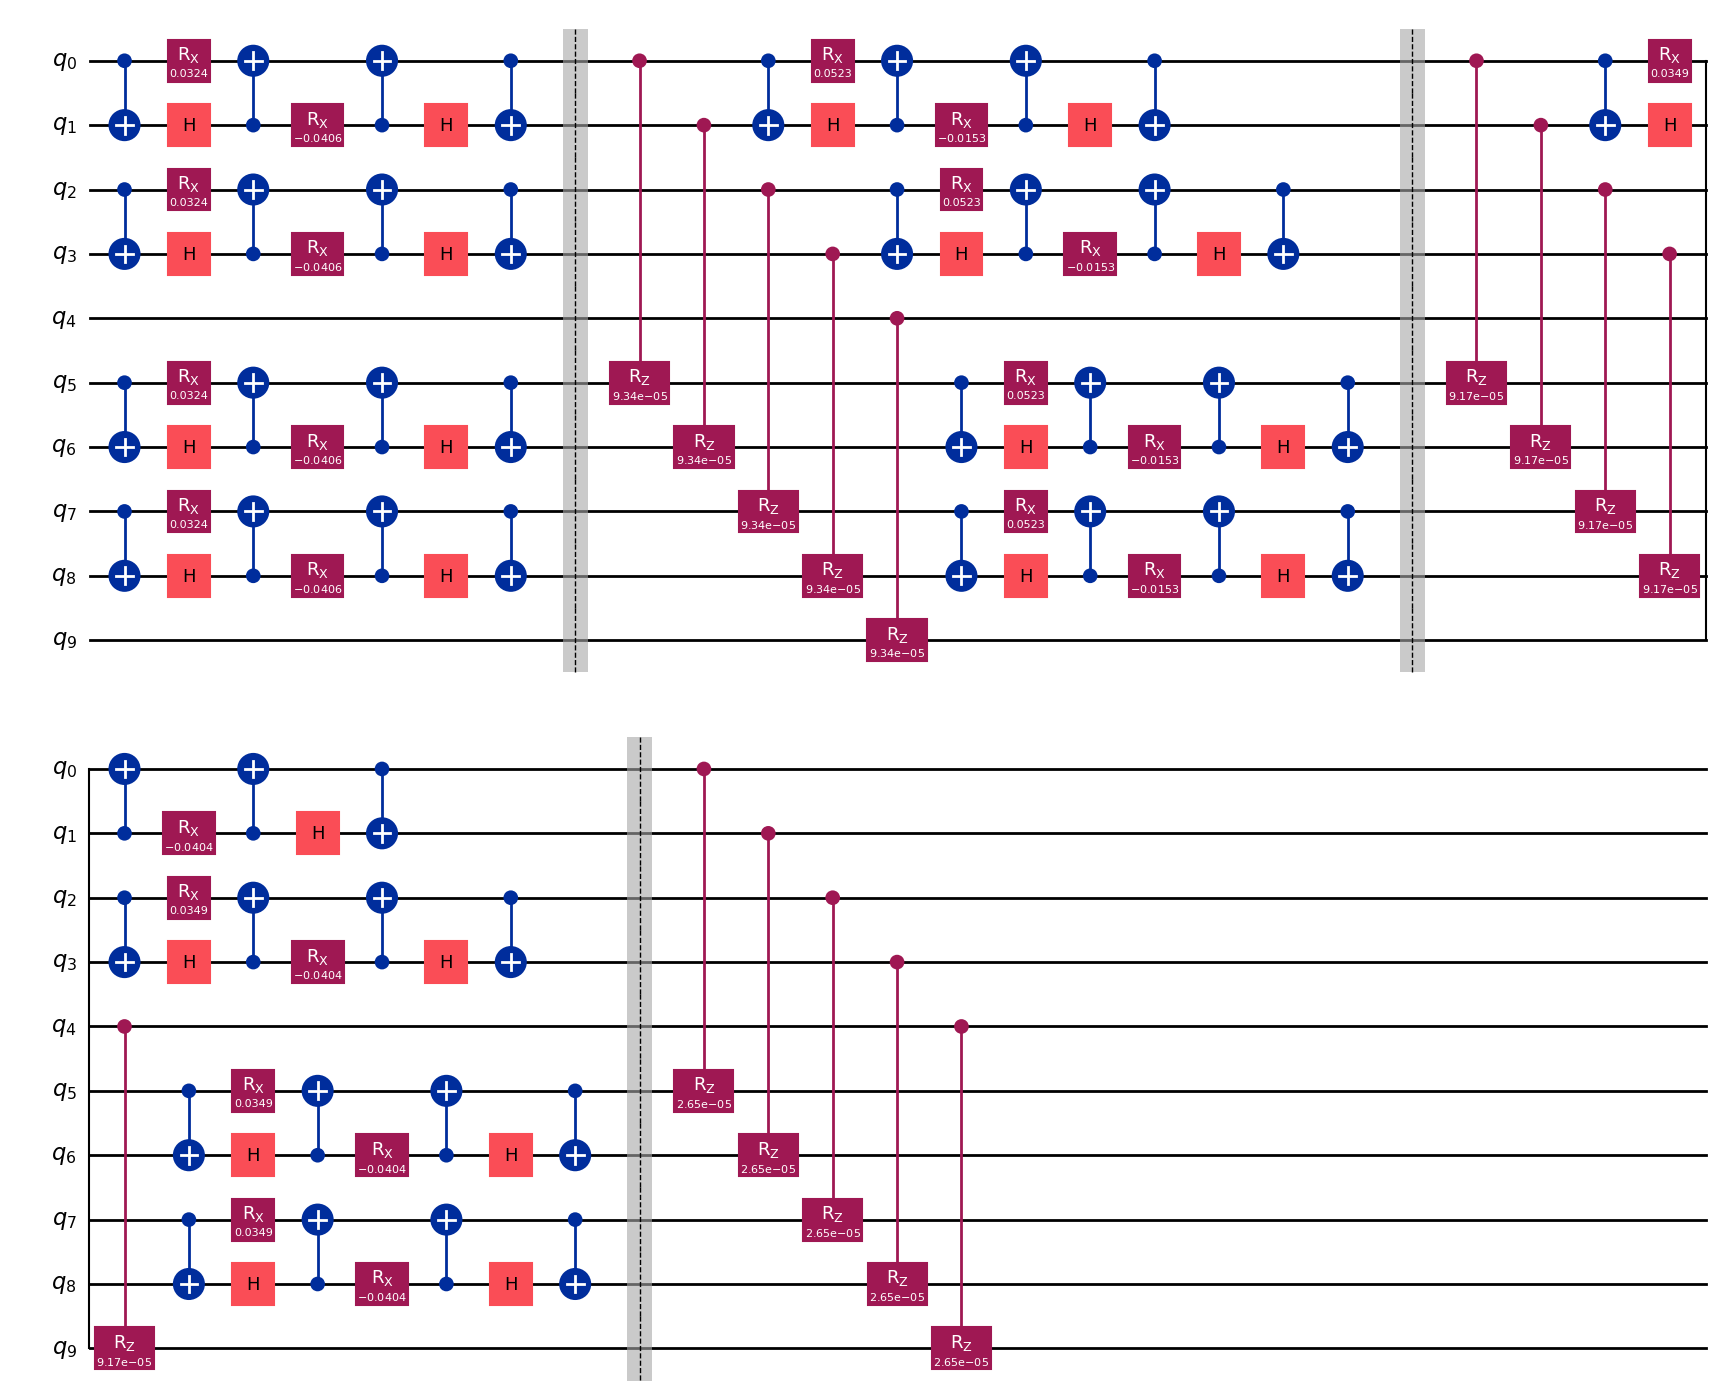

In [38]:
circ_complete = circ_initial.compose(circ_ansatz).compose(circ_measurement)
circ_complete.draw()

circ_ansatz = compose_ansatz_circuit(deepcopy(circ_empty), M, S, theta)
circ_ansatz.draw(output='mpl')
from qiskit.visualization import *
%matplotlib inline

circ_ansatz.draw(output='mpl')

plt.show()


In [5]:
import pennylane as qml
from pennylane import numpy as np

# Parameters
M = 5               # number of sites
t = 1.0             # hopping
U = 0.1             # Coulomb
S = 3               # Trotter steps
theta = np.random.rand(S, 5, requires_grad=True)

# Device: statevector simulator
dev = qml.device("default.qubit", wires=2*M)

# Define Hubbard Hamiltonian for given M
def hubbard_hamiltonian(M, t, U):
    coeffs = []
    ops = []

    # XX and YY terms (hopping)
    for i in range(M-1):
        for spin in [0, M]:  # up and down spins
            coeffs.append(-t/2)
            ops.append(qml.PauliX(wires=i+spin) @ qml.PauliX(wires=i+1+spin))
            coeffs.append(-t/2)
            ops.append(qml.PauliY(wires=i+spin) @ qml.PauliY(wires=i+1+spin))

    # ZZ terms (on-site interaction)
    for i in range(M):
        coeffs.append(U/4)
        ops.append(qml.PauliZ(wires=i) @ qml.PauliZ(wires=i+M))

    return qml.Hamiltonian(coeffs, ops)

H = hubbard_hamiltonian(M, t, U)

# Ansatz Circuit
def ansatz(params, wires):
    for s in range(S):
        for i in range(M-1):
            for spin in [0, M]:
                qml.CNOT(wires=[i+spin, i+1+spin])
                qml.RX(params[s, 0], wires=i+spin)
                qml.CNOT(wires=[i+1+spin, i+spin])
                qml.RX(params[s, 1], wires=i+1+spin)
                qml.CNOT(wires=[i+spin, i+1+spin])
        # ZZ terms
        for i in range(M):
            qml.CNOT(wires=[i, i+M])
            qml.RZ(params[s, 4], wires=i+M)
            qml.CNOT(wires=[i, i+M])

# Cost function
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params, wires=range(2*M))
    return qml.expval(H)

# Example Energy
energy = cost_fn(theta)
print(f"Energy: {energy:.6f}")


Energy: -0.251405
